In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
# import the dataset from specified location
data=pd.read_csv('pima-indians-diabetes.data.csv')

In [6]:
data.shape

(768, 9)

In [7]:
# showing the data from top 5
data.head()

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data[data['class']==0]

,preg,plas,pres,Skin,test,mass,pedi,age,class
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [9]:
# showing the data from bottom 5
data.tail()

,preg,plas,pres,Skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
# Print a concise summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1    plas   768 non-null    int64  
 2   pres    768 non-null    int64  
 3   Skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Computes a summary of statistics pertaining to the DataFrame columns
data.describe()

,preg,plas,pres,Skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.isnull().any()

preg     False
 plas    False
pres     False
Skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [13]:
# It returns the number of 
# missing values in the data set
data.isnull().sum()

preg     0
 plas    0
pres     0
Skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [14]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [15]:
# dividing the data into input and output
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [16]:
# importing the train_test_split from scikit-learn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=0)

In [17]:
# Returns size of xtrain 
xtrain.shape

(614, 8)

In [18]:
# Returns size of xtest 
xtest.shape

(154, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


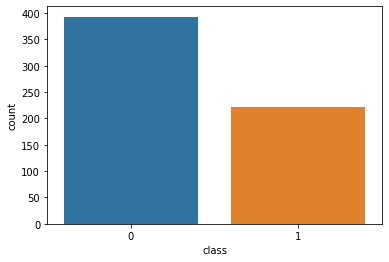

In [19]:
# countplot() method is used to Show the counts of 
# observations in each categorical bin using bars
sns.countplot(ytrain)

In [20]:
# Importing SMOTE for making balance data
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=1)
xtrain,ytrain=sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


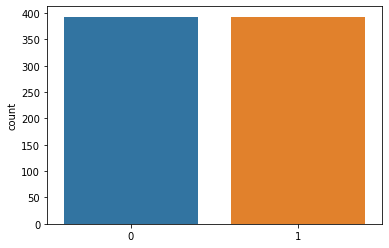

In [21]:
# countplot() method is used to Show the counts of 
# observations in each categorical bin using bars
sns.countplot(ytrain)

In [22]:
data.head()

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


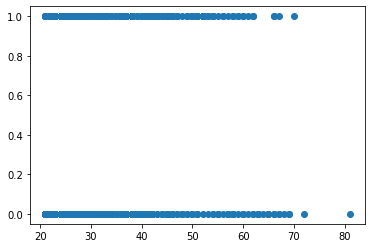

In [23]:
# draw a scatter plot diagram
# The x-axis represents age, and the y-axis represents class.
plt.scatter(data['age'],data['class'])

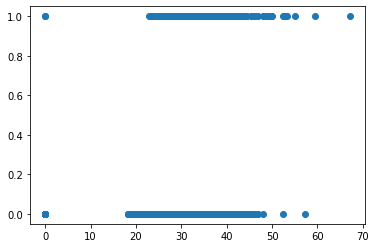

In [24]:
# draw a scatter plot diagram
# The x-axis represents mass, and the y-axis represents class.
plt.scatter(data['mass'],data['class'])

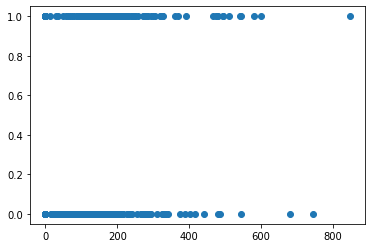

In [25]:
# draw a scatter plot diagram
# The x-axis represents test, and the y-axis represents class.
plt.scatter(data['test'],data['class'])

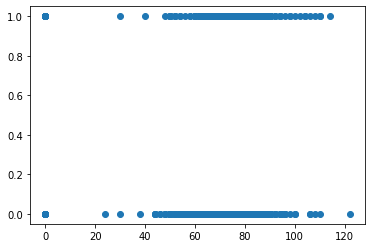

In [26]:
# draw a scatter plot diagram
# The x-axis represents pres, and the y-axis represents class.
plt.scatter(data['pres'],data['class'])

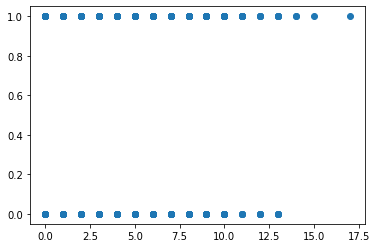

In [29]:
# draw a scatter plot diagram
# The x-axis represents preg, and the y-axis represents class.
plt.scatter(data['preg'],data['class'])

In [30]:
# Importing the Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
# Initializing the model
RFmodel = RandomForestClassifier()

In [31]:
# train the data with Random Forest model
RFmodel.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
RFpred=RFmodel.predict(xtest)

In [33]:
# Importing the Accuracy Metric for checking accuracy
from sklearn.metrics import accuracy_score

In [37]:
# Checking for accuracy score from actual data and predicted data
RFaccuracy=accuracy_score(ytest, RFpred)
RFaccuracy

0.8051948051948052

In [38]:
from sklearn.metrics import confusion_matrix
RFcm=confusion_matrix(ytest, RFpred)
RFcm

array([[90, 17],
       [13, 34]])

In [39]:
import sklearn.metrics as metrics

In [40]:
# AUC - ROC curve is a performance measurement for 
# the classification problems at various threshold settings
fpr,tpr,threshold=metrics.roc_curve(ytest,RFpred)
roc_aoc=metrics.auc(fpr,tpr)

Text(0, 0.5, 'FPR')

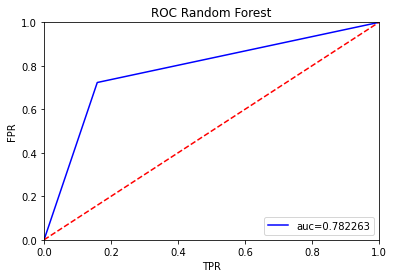

In [41]:
# Showing the ROC-AUC score
import matplotlib.pyplot as plt
plt.title('ROC Random Forest')
plt.plot(fpr,tpr,'b', label='auc=%f'%roc_aoc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('TPR')
plt.ylabel('FPR')

In [42]:

from sklearn.tree import DecisionTreeClassifier
# Intializing the model
DT=DecisionTreeClassifier()

In [43]:
# train the data with Decision Tree model
DT.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
DTpred=DT.predict(xtest)

In [45]:
# Checking for accuracy score from actual data and predicted data
accuracy_score(ytest, DTpred)

0.7662337662337663

In [46]:
# showing the confusion matrix
DTcm=confusion_matrix(ytest, DTpred)
DTcm

array([[82, 25],
       [11, 36]])

In [47]:
# AUC - ROC curve is a performance measurement for 
# the classification problems at various threshold settings
fpr,tpr,threshold=metrics.roc_curve(ytest,DTpred)
roc_aoc=metrics.auc(fpr,tpr)

Text(0, 0.5, 'FPR')

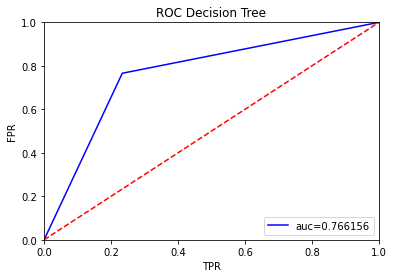

In [48]:
# Showing the ROC-AUC score
import matplotlib.pyplot as plt
plt.title('ROC Decision Tree')
plt.plot(fpr,tpr,'b', label='auc=%f'%roc_aoc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('TPR')
plt.ylabel('FPR')

In [49]:
# Importing the Sequential model to build model layer by layer
from tensorflow.keras.models import Sequential
# Importing the Dense layer, that is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense

In [50]:
# Intializing the Sequential model
NNmodel=Sequential()

In [51]:
# Input layer
NNmodel.add(Dense(units=8, kernel_initializer='random_uniform', activation='relu'))

In [52]:
# Hidden layer
NNmodel.add(Dense(units=16, kernel_initializer='random_uniform', activation='relu'))

In [53]:
# Output layer
NNmodel.add(Dense(units=1, kernel_initializer='random_uniform', activation='sigmoid'))

In [54]:
# Compiling the data
NNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
# train the data with Sequential model
NNmodel.fit(xtrain, ytrain, epochs=100, batch_size=40)

Epoch 1/100
20/20 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.4719
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5607
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5327
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5430
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5865
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.5315
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.6143
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6114
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.6501
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.6562
Epoch 11/

In [56]:
NNpred=NNmodel.predict(xtest)
NNpred = NNpred>0.5

In [57]:
# Checking for accuracy score from actual data and predicted data
NNaccuracy=accuracy_score(ytest,NNpred)
NNaccuracy

0.6558441558441559

In [58]:
# showing the confusion matrix
NNcm=confusion_matrix(ytest, NNpred)
NNcm

array([[60, 47],
       [ 6, 41]])

In [59]:
# AUC - ROC curve is a performance measurement for 
# the classification problems at various threshold settings
fpr,tpr,threshold=metrics.roc_curve(ytest,NNpred)
roc_aoc=metrics.auc(fpr,tpr)

Text(0, 0.5, 'FPR')

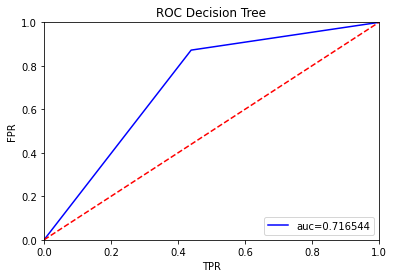

In [60]:
# Showing the ROC-AUC score
import matplotlib.pyplot as plt
plt.title('ROC Decision Tree')
plt.plot(fpr,tpr,'b', label='auc=%f'%roc_aoc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('TPR')
plt.ylabel('FPR')

In [61]:
# Importing the pickle to save the model
import pickle
pickle.dump(RFmodel, open('Diabeti_Mellitus_Prediction.pkl','wb'))